In [1]:
!pip install SpeechRecognition
!pip install matplotlib
!pip install librosa
!pip install pandas
!pip install tensorflow
!pip install transformers datasets evaluate seqeval
!pip install tf-keras
!pip install tensorflow[and-cuda]
!pip install ipywidgets --upgrade

In [2]:
import os
import librosa
import numpy as np
import json
import pandas as pd

In [3]:
# import speech_recognition as sr
# recognizer = sr.Recognizer()
# # input a file_path to a .wav file
# # returns the transcribed audio as a string
# # we can use BERT like in the homework to then tokenize/make into array and analyze it
# def getVectorOfWords(file_path):
#     with sr.AudioFile(file_path) as source:
#         audio = recognizer.record(source)
#     try:
#         # print("Transcription:", recognizer.recognize_google(audio))
#         return "" + recognizer.recognize_google(audio)
#     except sr.UnknownValueError:
#         return None

In [ ]:
# removes all files from images folder so subsequent runs don't have weird overlaps
# def clearImagesFolder():
#     print("Deleting all data from images folder")
#     directory = os.getcwd() + "/images"
#     for root, dirs, files in os.walk(directory, topdown=False):  # topdown=False to delete files before dirs
#         for file_name in files:
#             file_path = os.path.join(root, file_name)
#             if os.path.isfile(file_path) and file_name.endswith('.png'):
#                 os.remove(file_path)
#                 # print("" + file_path + " has been removed successfully")
#     print("All images removed successfully!")

In [ ]:
# import librosa.display
# import matplotlib.pyplot as plt
# # input a file_path to a .wav file
# # returns a png of the spectogram and a filepath to it
# def getSpectogram(file_path, emotion_label):
#     y, sr = librosa.load(file_path, sr=None) # load in the audio file and preserve its sample rate (replace with 16,000 if needed)
    
#     # Compute the spectrogram
#     D = librosa.stft(y)                        # Short-Time Fourier Transform
#     S_db = librosa.amplitude_to_db(abs(D), ref=np.max)  # Convert to decibel scale

#     # Plot and save the spectrogram
#     fig = plt.figure(figsize=(6, 6))                # Set the figure size -- > num pixels will be 100 times this
#     # can change the cmap to "viridis" or "plasma" for different color themes
#     librosa.display.specshow(S_db, sr=sr, x_axis="time", y_axis="log", cmap="magma")  # Log frequency scale to mimic human audio perception

#     # TODO: at first try hiding as many extra features as possible and compare to when they're included
#     # plt.colorbar(format="%+2.0f dB")           # Add a colorbar
#     # plt.title("Spectrogram")
#     # plt.xlabel("Time (s)")
#     # plt.ylabel("Frequency (Hz)")
#     plt.tight_layout()
    
#     # Save the spectrogram as an image file
#     processed_path = (file_path.split("/")[-1]).split(".")[0]
#     output_image_path = f"./images/{emotion_label}/{processed_path}.png"  # TODO: figure out naming conventions for the file -- either use path or just have a counter that we pass in
#     plt.savefig(output_image_path, dpi=300)    # Save as PNG with high resolution
#     plt.close()                                # Close the figure to free memory
    
#     return output_image_path

In [ ]:
# def getTargetEmotionFromCSV(audio_file_name):
#     # parse audio_file_name to get distinguishing file info for CSV lookup
#     dialogueID, utteranceID = (audio_file_name.split(".wav")[0]).split('_')
#     dialogueID, utteranceID = int(dialogueID[3:]), int(utteranceID[3:])
#     csv = pd.read_csv('./train_sent_emo.csv')
#     # Filter the row(s) that satisfy both conditions
#     condition1 = (csv['Dialogue_ID'] == dialogueID)  # First column matches 'dialogueID'
#     condition2 = (csv['Utterance_ID'] == utteranceID)  # Second column matches 'utteranceID'
#     filtered_rows = csv[condition1 & condition2]
#     return filtered_rows['Emotion'].iloc[0]

In [ ]:
# def traverse_audio_files(directory="./train_splits_wav"):
#     # clearImagesFolder() # deletes everything from the image folder
#     data = []
    
#     # Traverse and process .wav files
#     print("Starting audio file traversal")
#     iterCount = 0
#     for file_name in os.listdir(directory):
#         # limit the number of loops so this doesn't take THAT long
#         if iterCount >= 3000:
#             break
#         file_path = os.path.join(directory, file_name)
        
#         if os.path.isfile(file_path) and file_name.endswith('.wav'):
#             transcription = getVectorOfWords(file_path)
#             # filter out the audio files that can't get a clear transcription
#             if not transcription:
#                 continue
#             emotion = getTargetEmotionFromCSV(file_name)
#             image_path = getSpectogram(file_path, emotion)
#             data.append({"Transcription": transcription, "Spectogram": image_path, "Emotion": emotion})
#         iterCount += 1
#     df = pd.DataFrame(data)
#     print("Finished creating dataframe and traversing audio files")
#     return df

In [ ]:
# df = traverse_audio_files()
# df.to_csv('data3000.csv', index=False)
# print(df)

In [22]:
df = pd.read_csv('data9000.csv')
emotion_labels = df['Emotion'].unique()
print(emotion_labels)
print(df)

# df = pd.read_csv('data_all_given_transcript.csv')
# emotion_labels = df['Emotion'].unique()
# print(emotion_labels)
# print(df)

['neutral' 'joy' 'fear' 'surprise' 'sadness' 'disgust' 'anger']
                                          Transcription  \
0                                                 Mrs M   
1                                     why did you write   
2                                 I heard what you said   
3                                            for a walk   
4     when did they made me head of purchasing thank...   
...                                                 ...   
3826  play Joey's lovable 2 but the thing about Joey...   
3827                                  what do you think   
3828                                         I guess so   
3829  so I'm just going to go back to talking to my ...   
3830                                               Ross   

                                 Spectogram   Emotion  
0      ./images9000/neutral/dia575_utt1.png   neutral  
1     ./images9000/neutral/dia689_utt12.png   neutral  
2      ./images9000/neutral/dia845_utt8.png   neutral  
3  

In [23]:
import matplotlib.pyplot as plt
import math
from tensorflow.keras.utils import load_img
def spec_augment(spectrogram, time_warp_param=10, freq_mask_param=15, time_mask_param=15):
    """Applies SpecAugment to a spectrogram.

    Args:
        spectrogram: The input spectrogram.
        time_warp_param: Maximum time shift for warping.
        freq_mask_param: Maximum frequency mask length.
        time_mask_param: Maximum time mask length.

    Returns:
        The augmented spectrogram.
    """

    augmented_spectrogram = spectrogram.copy()

    # Time warping
    time_shift = np.random.randint(-time_warp_param, time_warp_param + 1)
    augmented_spectrogram = np.roll(augmented_spectrogram, time_shift, axis=1)

    # Frequency masking
    num_freq_masks = np.random.randint(1, 3)
    for _ in range(num_freq_masks):
        freq_mask_length = np.random.randint(1, freq_mask_param + 1)
        freq_start = np.random.randint(0, augmented_spectrogram.shape[0] - freq_mask_length)
        augmented_spectrogram[freq_start:freq_start + freq_mask_length, :] = 0

    # Time masking
    num_time_masks = np.random.randint(1, 3)
    for _ in range(num_time_masks):
        time_mask_length = np.random.randint(1, time_mask_param + 1)
        time_start = np.random.randint(0, augmented_spectrogram.shape[1] - time_mask_length)
        augmented_spectrogram[:, time_start:time_start + time_mask_length] = 0

    return augmented_spectrogram

def augment_emotion(emotion, df):
    newDf = df.copy()
    df = df.sample(frac=1, random_state=42).reset_index(drop=True)
    value_counts = df['Emotion'].value_counts()
    frequency = value_counts.get(emotion, 0)  # Handle non-existent value
    frequency = math.ceil(frequency*0.25)
    mx = 0
    for index, row in df.iterrows():
        if mx == frequency:
            break 
        spectrogram_path = row['Spectogram']
        curr_emotion = row['Emotion']
        text = row['Transcription']
        path_arr = spectrogram_path.split("/")
        if len(path_arr) < 4:
            print(f"Invalid path format: {spectrogram_path}")
            continue  # Skip this row if the path is invalid
        file_name = path_arr[3]
        emotion_folder = path_arr[2]
        folder = path_arr[1]
        if curr_emotion == emotion:
            mx += 1 

            img = load_img(spectrogram_path)
            spectrogram = np.array(img)
            augmented_spectrogram = spec_augment(spectrogram)
            path = "./"  + "images9000" + "/" + emotion_folder + "/" + file_name.split(".")[0] + "augmented.png"
            plt.imsave(path, augmented_spectrogram, cmap='gray')
            newDf.loc[len(newDf)] = [text, path, emotion]
    # newDf.to_csv('datatest2.csv',index=False)
    return newDf        



# augment_emotion("anger", df)

In [24]:
##### prepreocessing
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
import keras.callbacks
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
from transformers import DistilBertTokenizer
import torch
from sklearn.model_selection import train_test_split
from sklearn.utils import resample


### balance dataset
balance = True
if balance:
    # augment the data
    emotion_counts = df['Emotion'].value_counts()
    lowest_emotions = emotion_counts.nsmallest(2).index.tolist()
    for emotion in lowest_emotions:
        df = augment_emotion(emotion, df)
    
    # reduce the data
    neutral_class = 0  # Replace this with the actual index for "neutral" in factorized labels
    neutral_data = df[df['Emotion'] == "neutral"]
    non_neutral_data = df[df['Emotion'] != "neutral"]
    # Undersample the "neutral" class
    neutral_downsampled = resample(
        neutral_data,
        replace=False,  # Don't sample with replacement
        n_samples= int(df['Emotion'].value_counts().mean()),  # scale dwon the size
        random_state=42
    )
    
    # Combine undersampled "neutral" with other classes
    balanced_df = pd.concat([neutral_downsampled, non_neutral_data])
    balanced_df = balanced_df.sample(frac=1).reset_index(drop=True) # Shuffle the dataset for training

    texts = list(balanced_df['Transcription'])
    image_paths = list(balanced_df['Spectogram'])
    labels = pd.factorize(balanced_df['Emotion'])[0] # Re-factorize the labels after balancing
else:
    df = df.sample(frac=1).reset_index(drop=True) # Shuffle the dataset for training
    texts = list(df['Transcription'])
    image_paths = list(df['Spectogram'])
    labels = pd.factorize(df['Emotion'])[0]  # Convert categorical to integers
### prep for BERT
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
tokens = tokenizer(texts, padding=True, truncation=True, return_tensors="pt") # Tokenize transcriptions
input_ids = tokens['input_ids'].numpy()  # Convert to NumPy array
attention_masks = tokens['attention_mask'].numpy()

### prep for CNN
images = []

for path in image_paths:
    # Load image
    img = load_img(path, target_size=(128, 128))  # Resize to (128, 128)
    img_array = img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
    images.append(img_array)

images = np.array(images)  # Shape: (batch_size, 128, 128, 3)
### split the data
# Step 1: Split data into training + validation and test sets
x_images_trainval, x_images_test, x_text_trainval, x_text_test, x_attention_trainval, x_attention_test, y_trainval, y_test = train_test_split(
    images, input_ids, attention_masks, labels, test_size=0.15, random_state=42, stratify=labels
)
# Step 2: Further split training + validation into training and validation sets
x_images_train, x_images_val, x_text_train, x_text_val, x_attention_train, x_attention_val, y_train, y_val = train_test_split(
    x_images_trainval, x_text_trainval, x_attention_trainval, y_trainval, test_size=0.15, random_state=42, stratify=y_trainval
)

In [25]:
if balance:
    print("balanced\n", balanced_df['Emotion'].value_counts(), "\n") # balanced distribution
print("original\n", df['Emotion'].value_counts())  # Original distribution

balanced
 Emotion
joy         610
neutral     554
anger       418
surprise    406
sadness     324
fear        123
disgust     118
Name: count, dtype: int64 

original
 Emotion
neutral     1881
joy          610
anger        418
surprise     406
sadness      324
fear         123
disgust      118
Name: count, dtype: int64


In [71]:
import tensorflow as tf
from tensorflow.keras import layers, Model, regularizers
from transformers import TFDistilBertModel

# BERT Model Wrapper
class BertLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.bert = TFDistilBertModel.from_pretrained("distilbert-base-uncased")
    
    def call(self, inputs, training=False):
        input_ids, attention_mask = inputs
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask, training=training)
        return outputs.last_hidden_state[:, 0, :]  # CLS token embedding

# BERT Branch
text_input = layers.Input(shape=(46,), dtype='int32', name='text_input')  # Adjust shape accordingly
attention_input = layers.Input(shape=(46,), dtype='int32', name='attention_input')
bert_output = BertLayer()([text_input, attention_input])
bert_dense = layers.Dense(128, activation='relu', name='bert_dense')(bert_output)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.bias']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [72]:
# make array for cnn_models
cnn_models = []

In [73]:
# CNN Branch -- model 8
image_input = layers.Input(shape=(128, 128, 3), name='image_input')
x = layers.Conv2D(32, (3, 3), activation='relu')(image_input)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
cnn_dense = layers.Dense(128, activation='relu', name='cnn_dense')(x)

# Combine BERT and CNN Outputs
combined = layers.Concatenate()([bert_dense, cnn_dense])
combined_dense = layers.Dense(64, activation='relu')(combined)
output = layers.Dense(7, activation='softmax')(combined_dense)  # Replace `10` with `num_classes`

# Define and Compile Model
model8 = Model(inputs=[text_input, attention_input, image_input], outputs=output)
model8.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print(model8.summary())

cnn_models.append(("model8", model8))

Model: "functional_26"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_54 (Conv2D)  │ (None, 126, 126,  │        896 │ image_input[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_54    │ (None, 63, 63,    │          0 │ conv2d_54[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_55 (Conv2D)  │ (None, 61, 61,    │     18,496 │ max_pooling2d_54… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_55    │ (None, 30, 30,    │          0 │ conv2d_55[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ text_input          │ (None, 46)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_input     │ (None, 46)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_15          │ (None, 57600)     │          0 │ max_pooling2d_55… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bert_layer_2        │ (None, 768)       │          0 │ text_input[0][0], │
│ (BertLayer)         │                   │            │ attention_input[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_29          │ (None, 57600)     │          0 │ flatten_15[0][0]  │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bert_dense (Dense)  │ (None, 128)       │     98,432 │ bert_layer_2[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cnn_dense (Dense)   │ (None, 128)       │  7,372,928 │ dropout_29[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_27      │ (None, 256)       │          0 │ bert_dense[0][0], │
│ (Concatenate)       │                   │            │ cnn_dense[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_66 (Dense)    │ (None, 64)        │     16,448 │ concatenate_27[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_67 (Dense)    │ (None, 7)         │        455 │ dense_66[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 7,507,655 (28.64 MB)

 Trainable params: 7,507,655 (28.64 MB)

 Non-trainable params: 0 (0.00 B)

None


In [74]:
# CNN Branch -- model 10
image_input = layers.Input(shape=(128, 128, 3), name='image_input')
x = layers.Conv2D(32, (3, 3), activation='relu')(image_input)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
cnn_dense = layers.Dense(128, activation='relu', name='cnn_dense')(x)

# Combine BERT and CNN Outputs
combined = layers.Concatenate()([bert_dense, cnn_dense])
combined_dense = layers.Dense(64, activation='relu')(combined)
output = layers.Dense(7, activation='softmax')(combined_dense)

# Define and Compile Model
model10 = Model(inputs=[text_input, attention_input, image_input], outputs=output)
model10.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print(model10.summary())

cnn_models.append(("model10", model10))

Model: "functional_27"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_56 (Conv2D)  │ (None, 126, 126,  │        896 │ image_input[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_56    │ (None, 63, 63,    │          0 │ conv2d_56[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_57 (Conv2D)  │ (None, 61, 61,    │     18,496 │ max_pooling2d_56… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_57    │ (None, 30, 30,    │          0 │ conv2d_57[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_58 (Conv2D)  │ (None, 28, 28,    │     36,928 │ max_pooling2d_57… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_58    │ (None, 14, 14,    │          0 │ conv2d_58[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ text_input          │ (None, 46)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_input     │ (None, 46)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_16          │ (None, 12544)     │          0 │ max_pooling2d_58… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bert_layer_2        │ (None, 768)       │          0 │ text_input[0][0], │
│ (BertLayer)         │                   │            │ attention_input[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_30          │ (None, 12544)     │          0 │ flatten_16[0][0]  │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bert_dense (Dense)  │ (None, 128)       │     98,432 │ bert_layer_2[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cnn_dense (Dense)   │ (None, 128)       │  1,605,760 │ dropout_30[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_28      │ (None, 256)       │          0 │ bert_dense[0][0], │
│ (Concatenate)       │                   │            │ cnn_dense[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_68 (Dense)    │ (None, 64)        │     16,448 │ concatenate_28[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_69 (Dense)    │ (None, 7)         │        455 │ dense_68[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,777,415 (6.78 MB)

 Trainable params: 1,777,415 (6.78 MB)

 Non-trainable params: 0 (0.00 B)

None


In [75]:
# CNN Branch -- model 12
image_input = layers.Input(shape=(128, 128, 3), name='image_input')
x = layers.Conv2D(32, (3, 3), activation='relu')(image_input)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
cnn_dense = layers.Dense(128, activation='relu', name='cnn_dense')(x)

# Combine BERT and CNN Outputs
combined = layers.Concatenate()([bert_dense, cnn_dense])
combined_dense = layers.Dense(64, activation='relu')(combined)
output = layers.Dense(7, activation='softmax')(combined_dense)  # Replace `10` with `num_classes`

# Define and Compile Model
model12 = Model(inputs=[text_input, attention_input, image_input], outputs=output)
model12.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print(model12.summary())

cnn_models.append(("model12", model12))

Model: "functional_28"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_59 (Conv2D)  │ (None, 126, 126,  │        896 │ image_input[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_59    │ (None, 63, 63,    │          0 │ conv2d_59[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_60 (Conv2D)  │ (None, 61, 61,    │     18,496 │ max_pooling2d_59… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_60    │ (None, 30, 30,    │          0 │ conv2d_60[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_61 (Conv2D)  │ (None, 28, 28,    │     36,928 │ max_pooling2d_60… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_61    │ (None, 14, 14,    │          0 │ conv2d_61[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_62 (Conv2D)  │ (None, 12, 12,    │     36,928 │ max_pooling2d_61… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_62    │ (None, 6, 6, 64)  │          0 │ conv2d_62[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ text_input          │ (None, 46)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_input     │ (None, 46)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_17          │ (None, 2304)      │          0 │ max_pooling2d_62… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bert_layer_2        │ (None, 768)       │          0 │ text_input[0][0], │
│ (BertLayer)         │                   │            │ attention_input[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_31          │ (None, 2304)      │          0 │ flatten_17[0][0]  │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bert_dense (Dense)  │ (None, 128)       │     98,432 │ bert_layer_2[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cnn_dense (Dense)   │ (None, 128)       │    295,040 │ dropout_31[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_29      │ (None, 256)       │          0 │ bert_dense[0][0], │
│ (Concatenate)       │                   │            │ cnn_dense[0][0]   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 503,623 (1.92 MB)

 Trainable params: 503,623 (1.92 MB)

 Non-trainable params: 0 (0.00 B)

None


In [76]:
# CNN Branch -- model 13
image_input = layers.Input(shape=(128, 128, 3), name='image_input')
x = layers.Conv2D(32, (3, 3), activation='relu')(image_input)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.5)(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
cnn_dense = layers.Dense(128, activation='relu', name='cnn_dense')(x)

# Combine BERT and CNN Outputs
combined = layers.Concatenate()([bert_dense, cnn_dense])
combined_dense = layers.Dense(64, activation='relu')(combined)
output = layers.Dense(7, activation='softmax')(combined_dense)  # Replace `10` with `num_classes`

# Define and Compile Model
model13 = Model(inputs=[text_input, attention_input, image_input], outputs=output)
model13.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print(model13.summary())

cnn_models.append(("model13", model13))

Model: "functional_29"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_63 (Conv2D)  │ (None, 126, 126,  │        896 │ image_input[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_63    │ (None, 63, 63,    │          0 │ conv2d_63[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_64 (Conv2D)  │ (None, 61, 61,    │     18,496 │ max_pooling2d_63… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_64    │ (None, 30, 30,    │          0 │ conv2d_64[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_32          │ (None, 30, 30,    │          0 │ max_pooling2d_64… │
│ (Dropout)           │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_65 (Conv2D)  │ (None, 28, 28,    │     36,928 │ dropout_32[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_65    │ (None, 14, 14,    │          0 │ conv2d_65[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_66 (Conv2D)  │ (None, 12, 12,    │     36,928 │ max_pooling2d_65… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_66    │ (None, 6, 6, 64)  │          0 │ conv2d_66[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ text_input          │ (None, 46)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_input     │ (None, 46)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_18          │ (None, 2304)      │          0 │ max_pooling2d_66… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bert_layer_2        │ (None, 768)       │          0 │ text_input[0][0], │
│ (BertLayer)         │                   │            │ attention_input[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_33          │ (None, 2304)      │          0 │ flatten_18[0][0]  │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bert_dense (Dense)  │ (None, 128)       │     98,432 │ bert_layer_2[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cnn_dense (Dense)   │ (None, 128)       │    295,040 │ dropout_33[0][0]  │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 503,623 (1.92 MB)

 Trainable params: 503,623 (1.92 MB)

 Non-trainable params: 0 (0.00 B)

None


In [77]:
# CNN Branch -- model 15
image_input = layers.Input(shape=(128, 128, 3), name='image_input')
x = layers.Conv2D(32, (3, 3), activation='relu')(image_input)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
cnn_dense = layers.Dense(128, activation='relu', name='cnn_dense')(x)

# Combine BERT and CNN Outputs
combined = layers.Concatenate()([bert_dense, cnn_dense])
combined_dense = layers.Dense(64, activation='relu')(combined)
output = layers.Dense(7, activation='softmax')(combined_dense)  # Replace `10` with `num_classes`

# Define and Compile Model
model15 = Model(inputs=[text_input, attention_input, image_input], outputs=output)
model15.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print(model15.summary())

cnn_models.append(("model15", model15))

Model: "functional_30"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_67 (Conv2D)  │ (None, 126, 126,  │        896 │ image_input[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_67    │ (None, 63, 63,    │          0 │ conv2d_67[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_68 (Conv2D)  │ (None, 61, 61,    │     18,496 │ max_pooling2d_67… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_68    │ (None, 30, 30,    │          0 │ conv2d_68[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_69 (Conv2D)  │ (None, 28, 28,    │     36,928 │ max_pooling2d_68… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_69    │ (None, 14, 14,    │          0 │ conv2d_69[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_70 (Conv2D)  │ (None, 12, 12,    │     36,928 │ max_pooling2d_69… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_70    │ (None, 6, 6, 64)  │          0 │ conv2d_70[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_74 (Dense)    │ (None, 6, 6, 128) │      8,320 │ max_pooling2d_70… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_71 (Conv2D)  │ (None, 4, 4, 64)  │     73,792 │ dense_74[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_71    │ (None, 2, 2, 64)  │          0 │ conv2d_71[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ text_input          │ (None, 46)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_input     │ (None, 46)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_19          │ (None, 256)       │          0 │ max_pooling2d_71… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bert_layer_2        │ (None, 768)       │          0 │ text_input[0][0], │
│ (BertLayer)         │                   │            │ attention_input[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_34          │ (None, 256)       │          0 │ flatten_19[0][0]  │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 323,591 (1.23 MB)

 Trainable params: 323,591 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

None


In [78]:
### combined layer variation
# Variation 1: Simple concatenation
def build_model_variation1(bert_dense, cnn_dense):
    combined = layers.Concatenate()([bert_dense, cnn_dense])
    x = layers.Dense(128, activation='relu')(combined)
    x = layers.Dropout(0.4)(x)
    output = layers.Dense(7, activation='softmax')(x)  # Replace `10` with num_classes
    return output

# Variation 2: Attention mechanism
def build_model_variation2(bert_dense, cnn_dense):
    attention = layers.Attention()([bert_dense, cnn_dense])
    combined = layers.Concatenate()([attention, bert_dense, cnn_dense])
    x = layers.Dense(128, activation='relu')(combined)
    x = layers.Dropout(0.4)(x)
    output = layers.Dense(7, activation='softmax')(x)  # Replace `10` with num_classes
    return output

# Variation 3: Regularized Dense Layers
def build_model_variation3(bert_dense, cnn_dense):
    combined = layers.Concatenate()([bert_dense, cnn_dense])
    x = layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01))(combined)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(128, activation='relu')(x)
    output = layers.Dense(7, activation='softmax')(x)  # Replace `10` with num_classes
    return output


In [ ]:
##### train the model
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_accuracy',    # Metric to monitor (e.g., validation loss)
    patience=5,            # Number of epochs with no improvement after which training stops
    restore_best_weights=True  # Restore the best weights once training stops
)

histories = []
valid_maxes = []

variations = [
    ("variation1", build_model_variation1),
    ("variation2", build_model_variation2),
    ("variation3", build_model_variation3)
]

for variation_name, variation_fn in variations:
    for label, model in cnn_models:
        print(f"Training {label} with {variation_name}")

        # Build model with the current variation and reuse dense layers from 2 branches
        bert_output_layer = model.get_layer('bert_dense').output
        cnn_output_layer = model.get_layer('cnn_dense').output
        output = variation_fn(bert_output_layer, cnn_output_layer)

        # Rename inputs to avoid conflicts
        image_input_variation = layers.Input(shape=(128, 128, 3), name='image_input_variation')
        text_input_variation = layers.Input(shape=(128,), name='text_input_variation')
        attention_input_variation = layers.Input(shape=(128,), name='attention_input_variation')
        
        combined_model = Model(inputs=[text_input_variation, attention_input_variation, image_input_variation], outputs=output)
        combined_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        
        # Train the model
        history = model.fit(
            x={'text_input': x_text_train, 'attention_input': x_attention_train, 'image_input': x_images_train},
            y=y_train,
            batch_size=32,
            epochs=50,
            validation_data=(
                {'text_input': x_text_val, 'attention_input': x_attention_val, 'image_input': x_images_val},
                y_val
            ),
            callbacks=[early_stopping]
        )
        num_layers = int(label.split("l")[1]) # extract the number of labels associated with the model
        label = label + " " + variation_name
        histories.append((label, history))
        valid_maxes.append((num_layers, max(history.history['val_accuracy']) * 100))
        print("Best validation accuracy percentage:", max(history.history['val_accuracy']) * 100, "%\n")

Training model8 with variation1
Epoch 1/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 20s 161ms/step - accuracy: 0.2346 - loss: 2.1738 - val_accuracy: 0.2423 - val_loss: 1.7939
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.2853 - loss: 1.7493 - val_accuracy: 0.3098 - val_loss: 1.7267
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.3468 - loss: 1.6554 - val_accuracy: 0.3374 - val_loss: 1.7012
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.3711 - loss: 1.6365 - val_accuracy: 0.3098 - val_loss: 1.7067
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.3685 - loss: 1.6068 - val_accuracy: 0.3528 - val_loss: 1.6789
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.3946 - loss: 1.5898 - val_accuracy: 0.3190 - val_loss: 1.7361
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4159 - loss: 1.5252 - val_accuracy: 0.3620 - val_loss: 1.7079
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4285 - loss:

In [ ]:
### graph models and their max validation accuracies
# Extract the number of layers and corresponding validation accuracies
num_layers = [x[0] for x in valid_maxes]
val_accuracies = [x[1] for x in valid_maxes]

# Plotting the trend
plt.figure(figsize=(8, 6))
plt.plot(num_layers, val_accuracies, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)

# Add titles and labels
plt.xlabel('Number of Layers', fontsize=12)
plt.ylabel('Max Validation Accuracy (%)', fontsize=12)

# Show grid and plot
plt.grid(True)
plt.xticks(num_layers)  # To ensure each x-tick is labeled
if balance:
    plt.title('Validation Accuracy vs Number of Layers with Balanced Data', fontsize=14)
    plt.savefig('./plots/numlayers_vs_val_acc_balanced', dpi=300)
else:
    plt.title('Validation Accuracy vs Number of Layers with Unbalanced Data', fontsize=14)
    plt.savefig('./plots/numlayers_vs_val_acc_unbalanced', dpi=300)
plt.show()

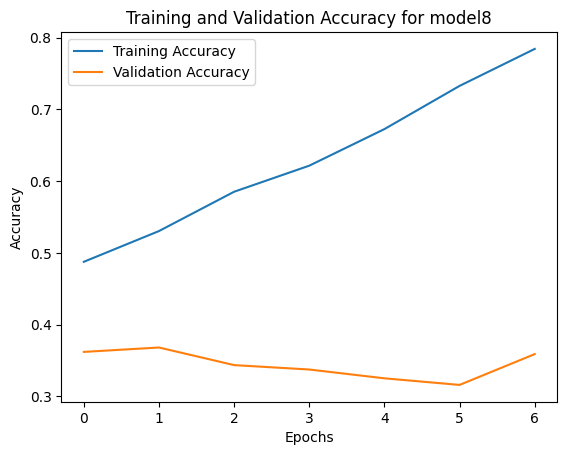

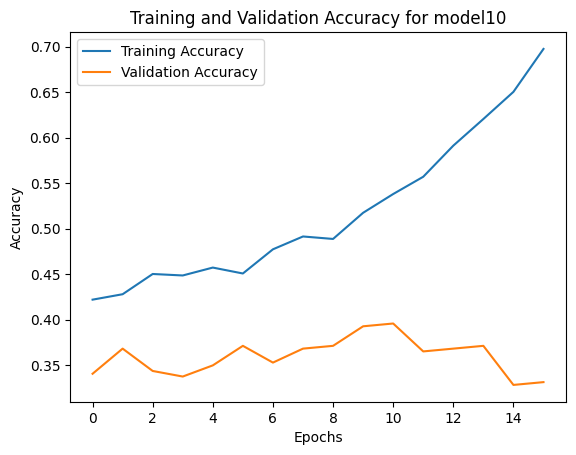

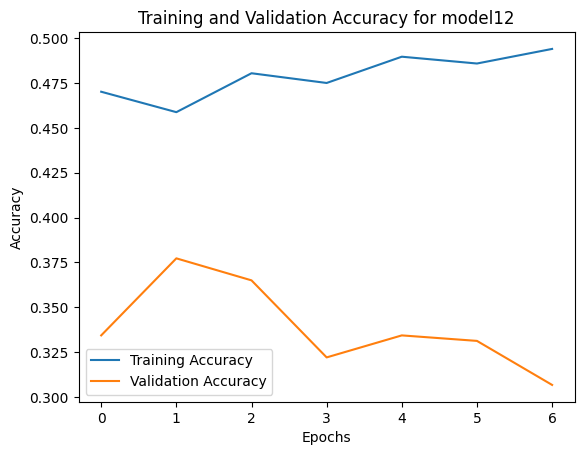

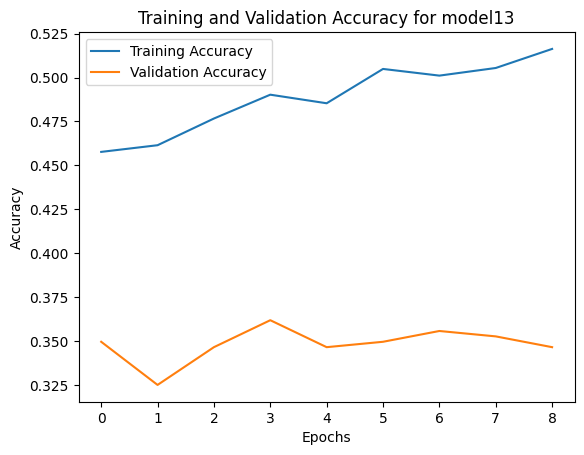

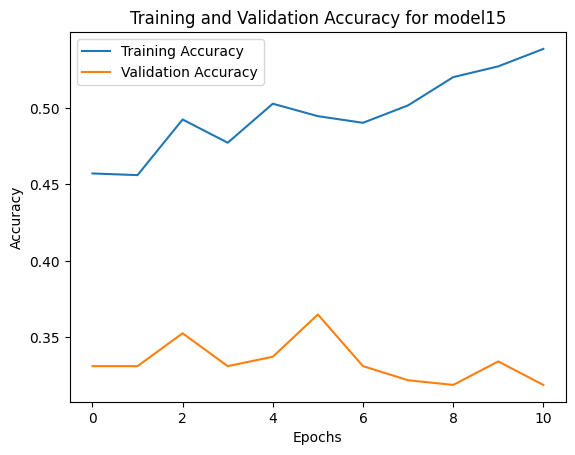

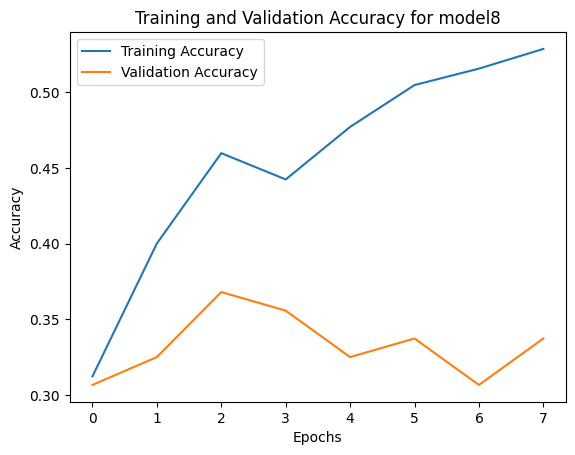

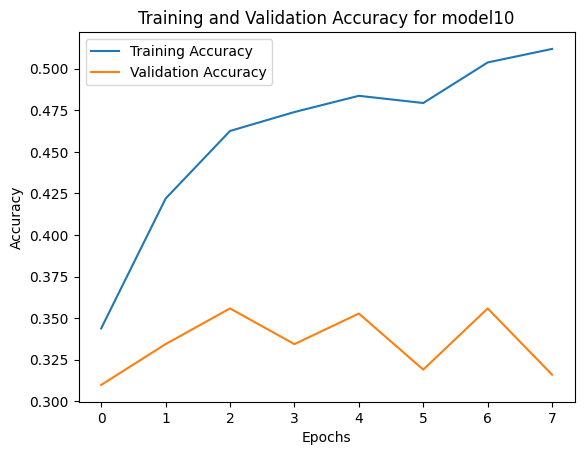

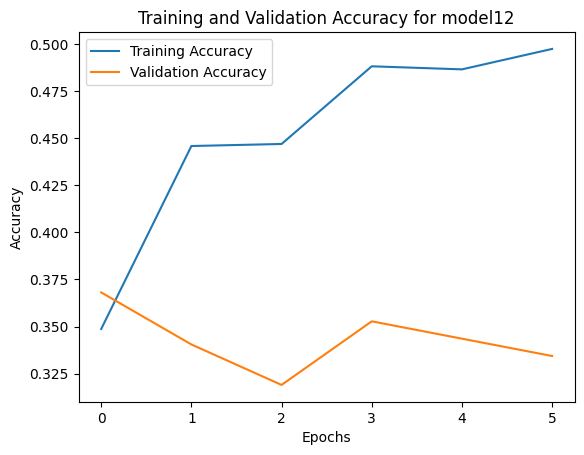

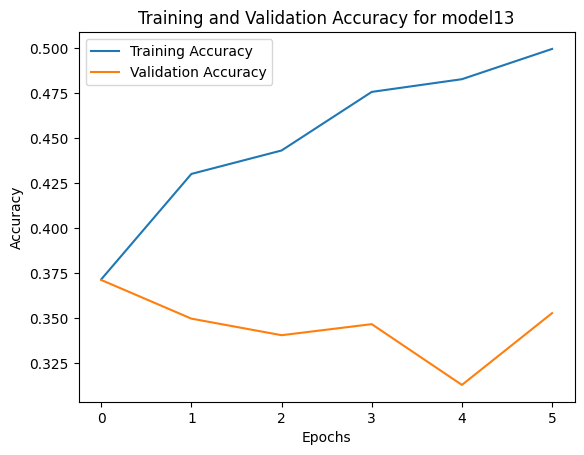

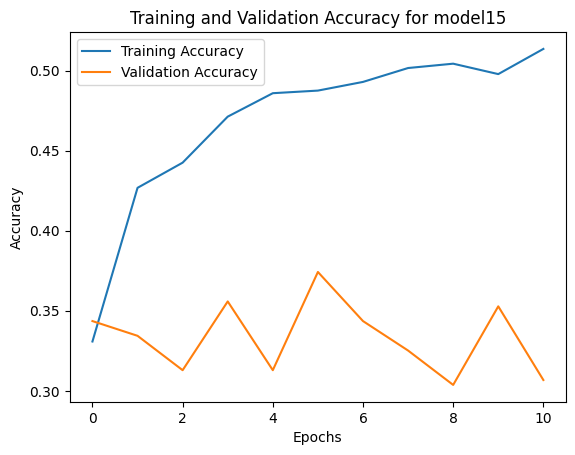

In [53]:
### graphs
import matplotlib.pyplot as plt
# Plot training vs. validation accuracy
for name, history in histories:
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Training and Validation Accuracy for {name}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig('./plots/train_vs_val_acc', dpi=300)
    plt.show()

model8
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Accuracy: 0.3264
F1 Score (Weighted): 0.3180
F1 Score for anger: 0.2857
F1 Score for disgust: 0.3223
F1 Score for fear: 0.3962
F1 Score for joy: 0.3957
F1 Score for neutral: 0.1905
F1 Score for sadness: 0.2410
F1 Score for surprise: 0.0909
model10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Accuracy: 0.3238
F1 Score (Weighted): 0.3004
F1 Score for anger: 0.2963
F1 Score for disgust: 0.3353
F1 Score for fear: 0.2000
F1 Score for joy: 0.4522
F1 Score for neutral: 0.2647
F1 Score for sadness: 0.1493
F1 Score for surprise: 0.1739
model12
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Accuracy: 0.3029
F1 Score (Weighted): 0.2809
F1 Score for anger: 0.0290
F1 Score for disgust: 0.3566
F1 Score for fear: 0.2963
F1 Score for joy: 0.4224
F1 Score for neutral: 0.1739
F1 Score for sadness: 0.2593
F1 Score for surprise: 0.2121
model13
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Accuracy: 0.3238
F1 Score (Weighted): 0.2986
F1 Score for anger: 0.1408
F1 Score for disg

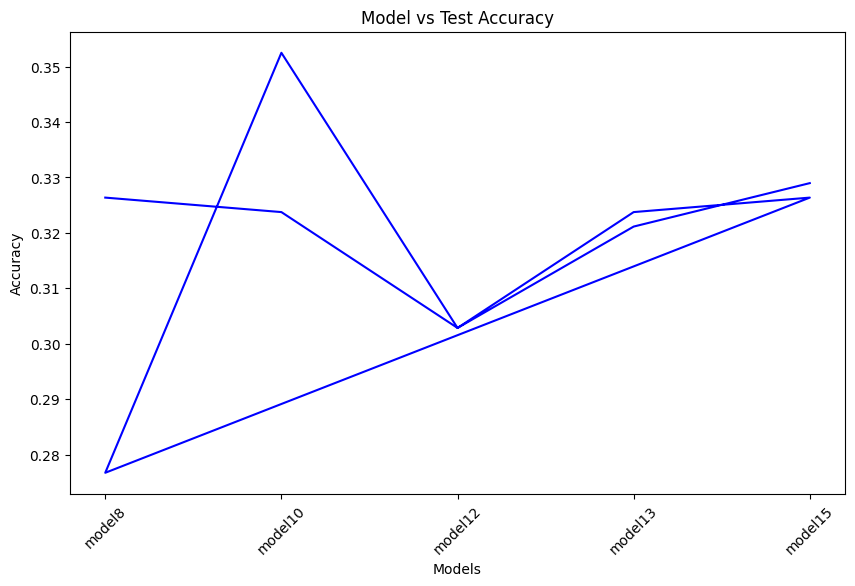

In [54]:
from sklearn.metrics import accuracy_score, f1_score

# Example emotion labels
emotion_labels = ['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise']

# To store accuracies for each model
model_accuracies = []

predictions = []
# Predict on the test data
for name, model in cnn_models:
    print(name)
    y_pred = model.predict({
        'text_input': x_text_test, 
        'attention_input': x_attention_test, 
        'image_input': x_images_test
    })
    y_pred_classes = y_pred.argmax(axis=1)  # Convert softmax outputs to class predictions
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred_classes)
    print(f"Accuracy: {accuracy:.4f}")
    model_accuracies.append((name, accuracy))  # Store accuracy for plotting
    
    # Weighted F1 Score
    f1 = f1_score(y_test, y_pred_classes, average='weighted')
    print(f"F1 Score (Weighted): {f1:.4f}")
    
    # F1 Score per class
    f1_per_class = f1_score(y_test, y_pred_classes, average=None)
    for idx, label in enumerate(emotion_labels):
        print(f"F1 Score for {label}: {f1_per_class[idx]:.4f}")
    
    # Append predictions for class distribution plotting
    predictions.append((name, y_pred_classes))

# Plot accuracy for each model
model_names = [name for name, _ in model_accuracies]
accuracies = [accuracy for _, accuracy in model_accuracies]

plt.figure(figsize=(10, 6))
plt.plot(model_names, accuracies, color='blue')
plt.title('Model vs Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.show()

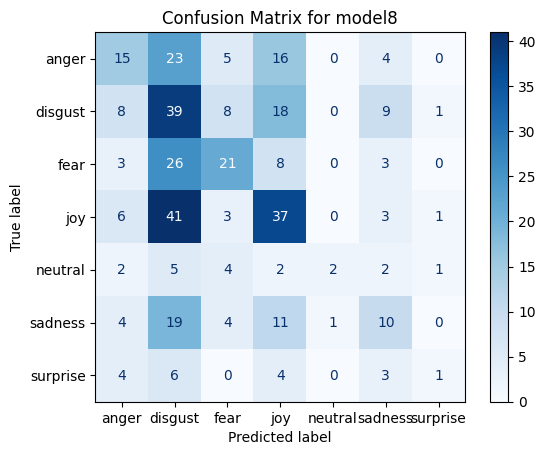

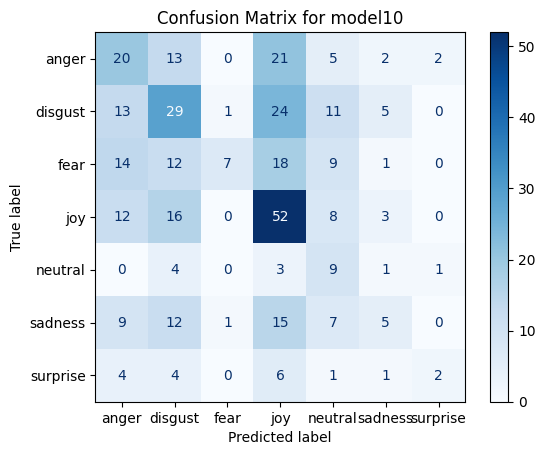

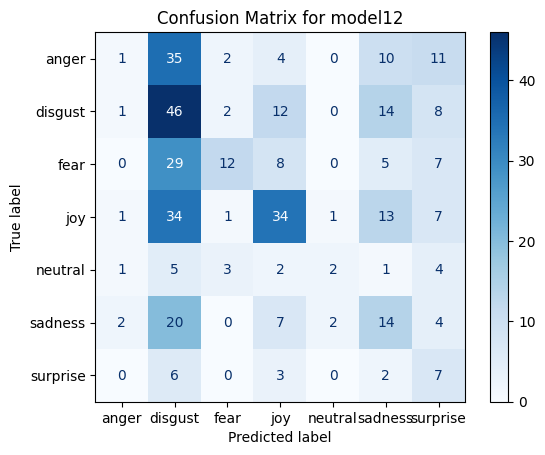

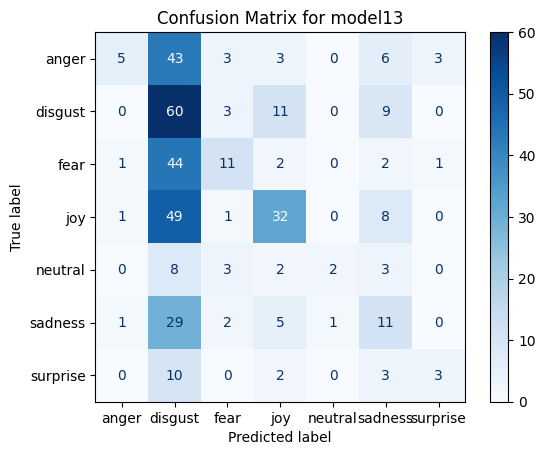

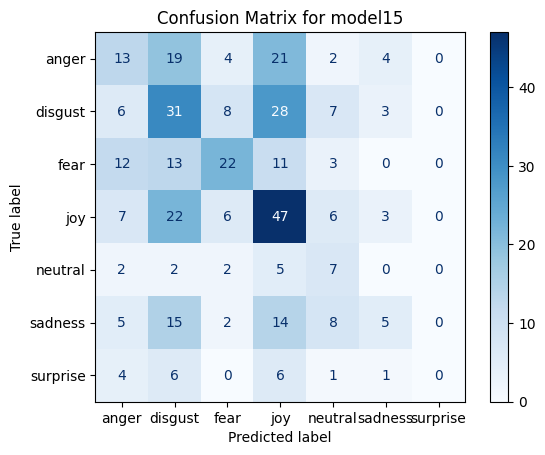

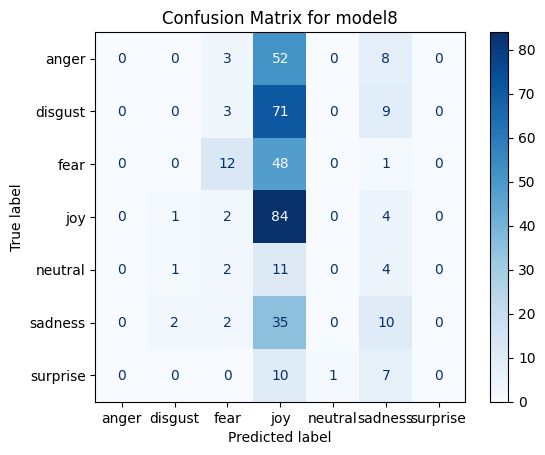

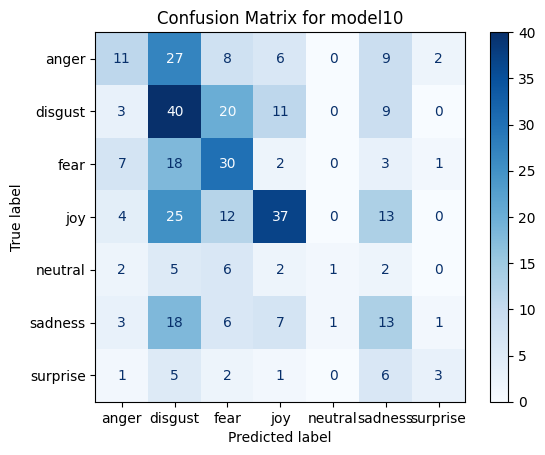

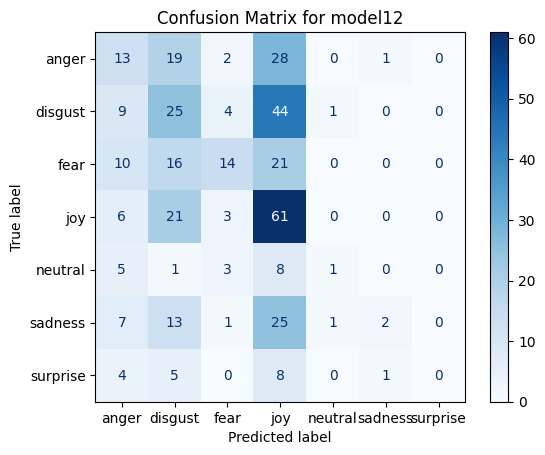

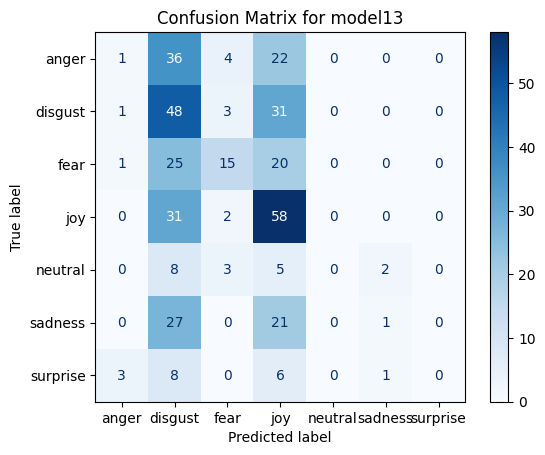

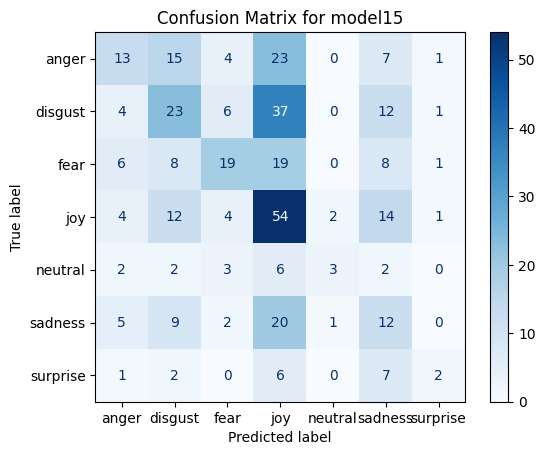

In [55]:
## could either move this into the for loop above or save the y_pred_classes in an array
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for name, pred_classes in predictions:
    # Compute confusion matrix
    cm = confusion_matrix(y_test, pred_classes)
    
    # Plot confusion matrix as a heatmap
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=emotion_labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {name}')
    # plt.savefig('./plots/confusion_matrix', dpi=300)
    plt.show()


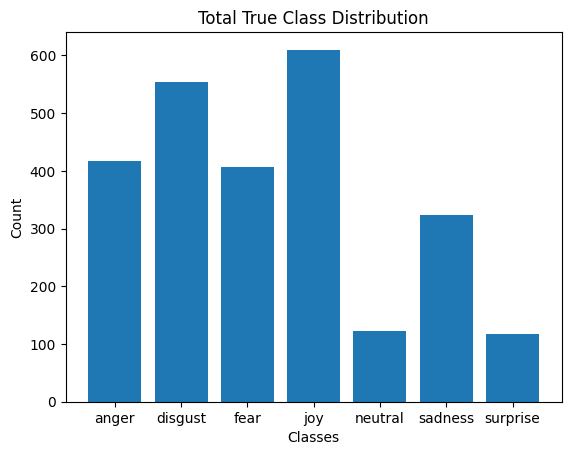

In [56]:
# Combine the true labels from the training, validation, and test sets
y_all_classes = np.concatenate([y_train, y_val, y_test])

# Plot class distribution of all labels
unique, counts = np.unique(y_all_classes, return_counts=True)
plt.bar(unique, counts, tick_label=emotion_labels)  # Use emotion_labels to label your classes
plt.title('Total True Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.savefig('./plots/total_true_class_distribution', dpi=300)
plt.show()


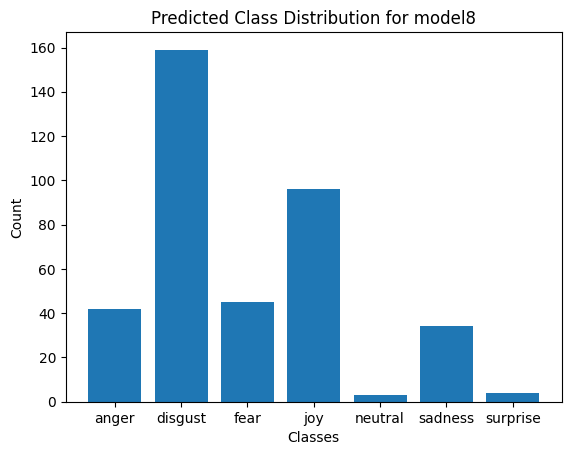

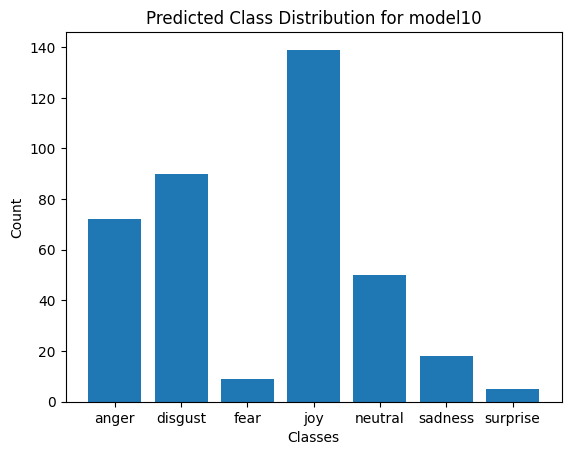

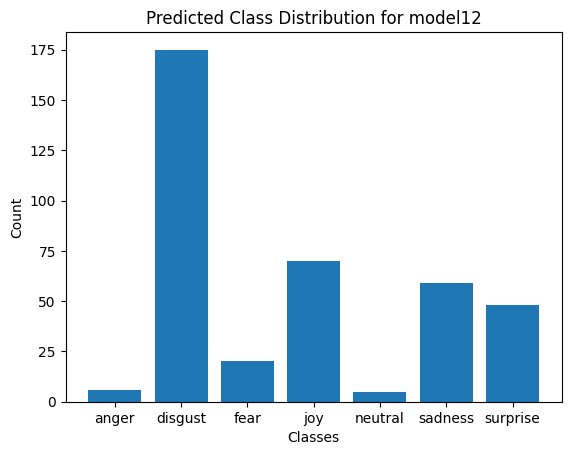

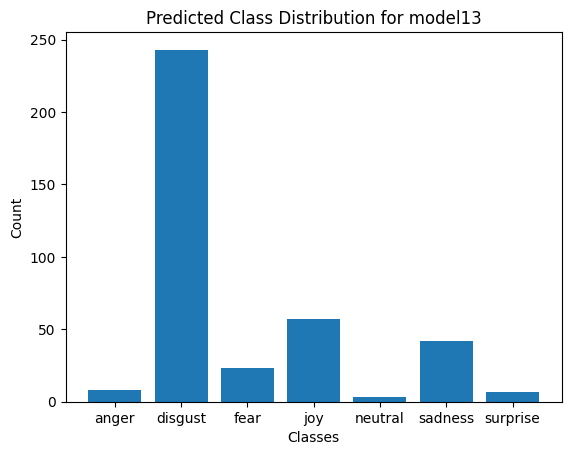

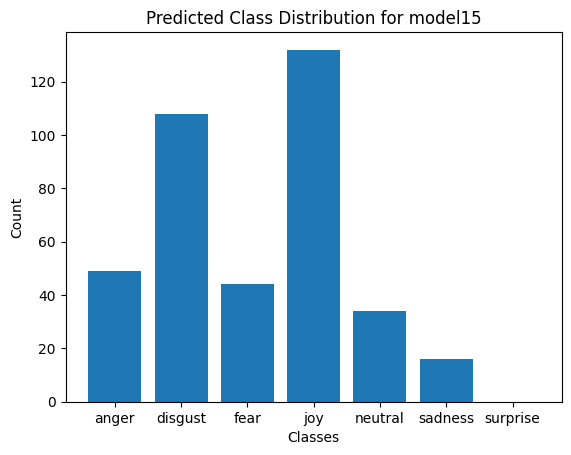

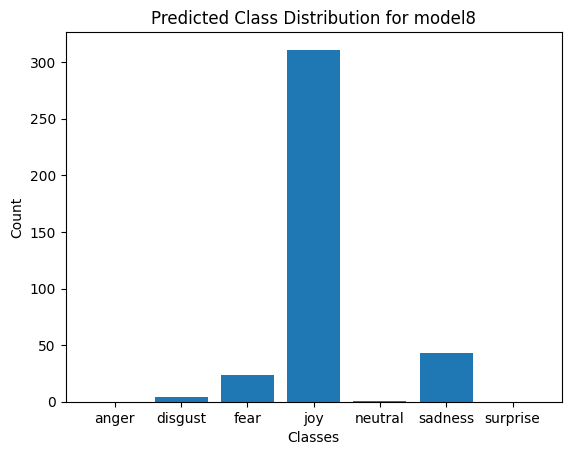

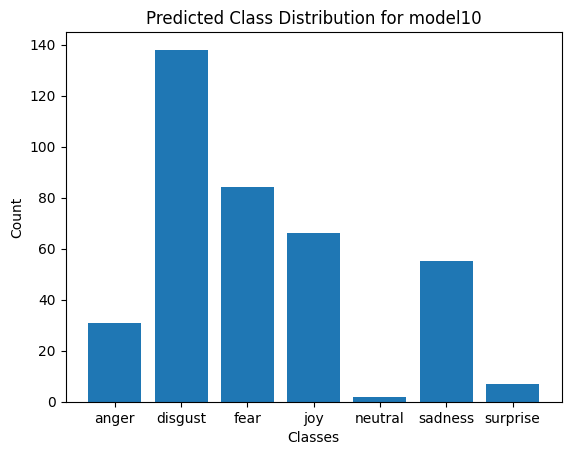

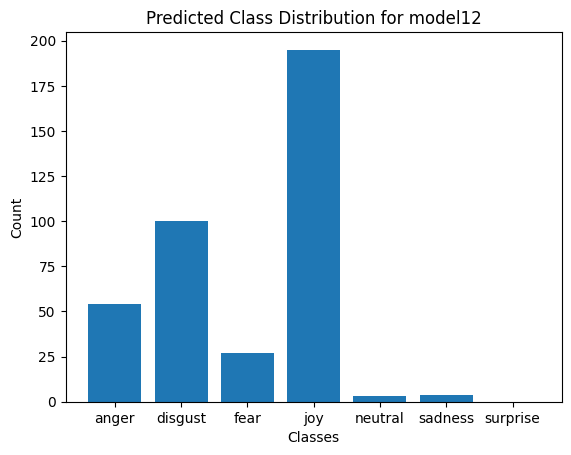

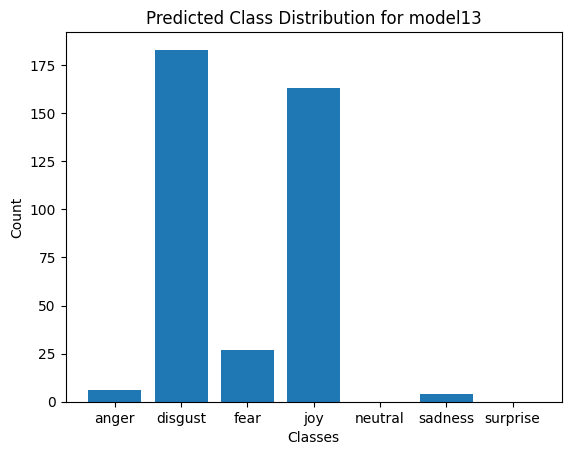

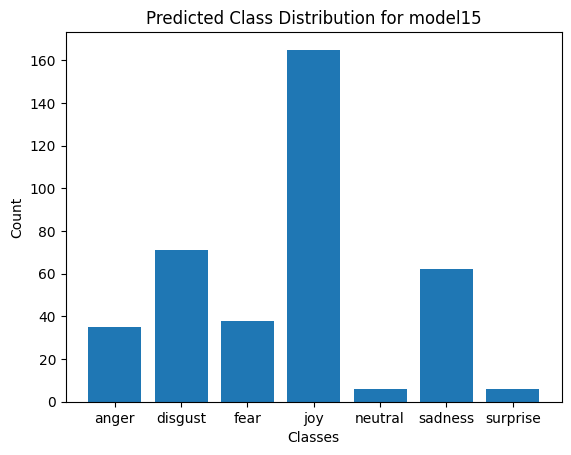

In [57]:
for name, pred_classes in predictions:
    # Initialize counts for all emotion classes
    counts = np.zeros(len(emotion_labels), dtype=int)
    
    # Get unique class counts from predictions
    unique, unique_counts = np.unique(pred_classes, return_counts=True)
    
    # Update counts for the unique classes
    for u, count in zip(unique, unique_counts):
        counts[u] = count
    
    # Plot the class distribution
    plt.bar(range(len(emotion_labels)), counts, tick_label=emotion_labels)
    plt.title(f'Predicted Class Distribution for {name}')
    plt.xlabel('Classes')
    plt.ylabel('Count')
    plt.show()
